In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [2]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is ACC0-1167

 Directory of C:\Users\shand\Documents\Siddy\ExcelR\Assignment\Decision Tree

14-01-2022  00:26    <DIR>          .
13-01-2022  03:26    <DIR>          ..
14-01-2022  00:26    <DIR>          .ipynb_checkpoints
13-01-2022  03:25            17,023 Company_Data.csv
14-01-2022  00:26            11,840 Decision Tree.ipynb
13-01-2022  03:25            21,837 Fraud_check.csv
13-01-2022  03:25             1,377 problem statement(company data).txt
13-01-2022  03:25               460 Problem_statement(Fraudcheck).txt
               5 File(s)         52,537 bytes
               3 Dir(s)  207,457,943,552 bytes free


## Company Data

In [47]:
company = pd.read_csv('Company_Data.csv')

In [48]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [49]:
company1 = company.copy()

In [50]:
company1.Sales.max(), '\n' , company1.Sales.min()

(16.27, '\n', 0.0)

In [51]:
pd.cut(company1.Sales, bins = 3).value_counts(sort = False)

(-0.0163, 5.423]    102
(5.423, 10.847]     247
(10.847, 16.27]      51
Name: Sales, dtype: int64

In [52]:
labels = ['Low', 'Medium', 'High']
company1.Sales = pd.cut(company1.Sales, bins = 3, labels = labels) 

In [53]:
company1.Sales.value_counts()

Medium    247
Low       102
High       51
Name: Sales, dtype: int64

In [54]:
company1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Medium,139,23,3,37,120,Medium,55,11,No,Yes
397,Medium,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Medium,100,79,7,284,95,Bad,50,12,Yes,Yes


In [55]:
label_encoder = preprocessing.LabelEncoder()
company1.Sales = label_encoder.fit_transform(company1.Sales)

In [56]:
company1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,Bad,42,17,Yes,Yes
1,0,111,48,16,260,83,Good,65,10,Yes,Yes
2,2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,2,117,100,4,466,97,Medium,55,14,Yes,Yes
4,1,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,Good,33,14,Yes,Yes
396,2,139,23,3,37,120,Medium,55,11,No,Yes
397,2,162,26,12,368,159,Medium,40,18,Yes,Yes
398,2,100,79,7,284,95,Bad,50,12,Yes,Yes


In [57]:
company1.Sales.value_counts()

2    247
1    102
0     51
Name: Sales, dtype: int64

In [31]:
company1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sales        400 non-null    int32 
 1   CompPrice    400 non-null    int64 
 2   Income       400 non-null    int64 
 3   Advertising  400 non-null    int64 
 4   Population   400 non-null    int64 
 5   Price        400 non-null    int64 
 6   ShelveLoc    400 non-null    object
 7   Age          400 non-null    int64 
 8   Education    400 non-null    int64 
 9   Urban        400 non-null    object
 10  US           400 non-null    object
dtypes: int32(1), int64(7), object(3)
memory usage: 32.9+ KB


In [32]:
company1.ShelveLoc = label_encoder.fit_transform(company1.ShelveLoc)
company1.Urban = label_encoder.fit_transform(company1.Urban)
company1.US = label_encoder.fit_transform(company1.US)

In [33]:
company1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,2,139,23,3,37,120,2,55,11,0,1
397,2,162,26,12,368,159,2,40,18,1,1
398,2,100,79,7,284,95,0,50,12,1,1


In [34]:
company1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Sales        400 non-null    int32
 1   CompPrice    400 non-null    int64
 2   Income       400 non-null    int64
 3   Advertising  400 non-null    int64
 4   Population   400 non-null    int64
 5   Price        400 non-null    int64
 6   ShelveLoc    400 non-null    int32
 7   Age          400 non-null    int64
 8   Education    400 non-null    int64
 9   Urban        400 non-null    int32
 10  US           400 non-null    int32
dtypes: int32(4), int64(7)
memory usage: 28.2 KB


In [37]:
x = company1.iloc[:,1:]
y = company1.iloc[:,0]

In [38]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [39]:
y

0      2
1      0
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    2
Name: Sales, Length: 400, dtype: int32

### Building Decision Tree Classifier

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [41]:
company_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_split = 5)
company_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

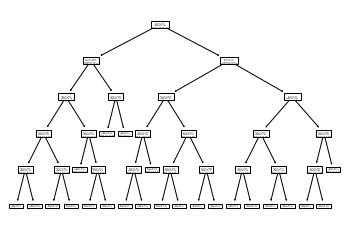

In [43]:
tree.plot_tree(company_model);

In [45]:
company1.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1


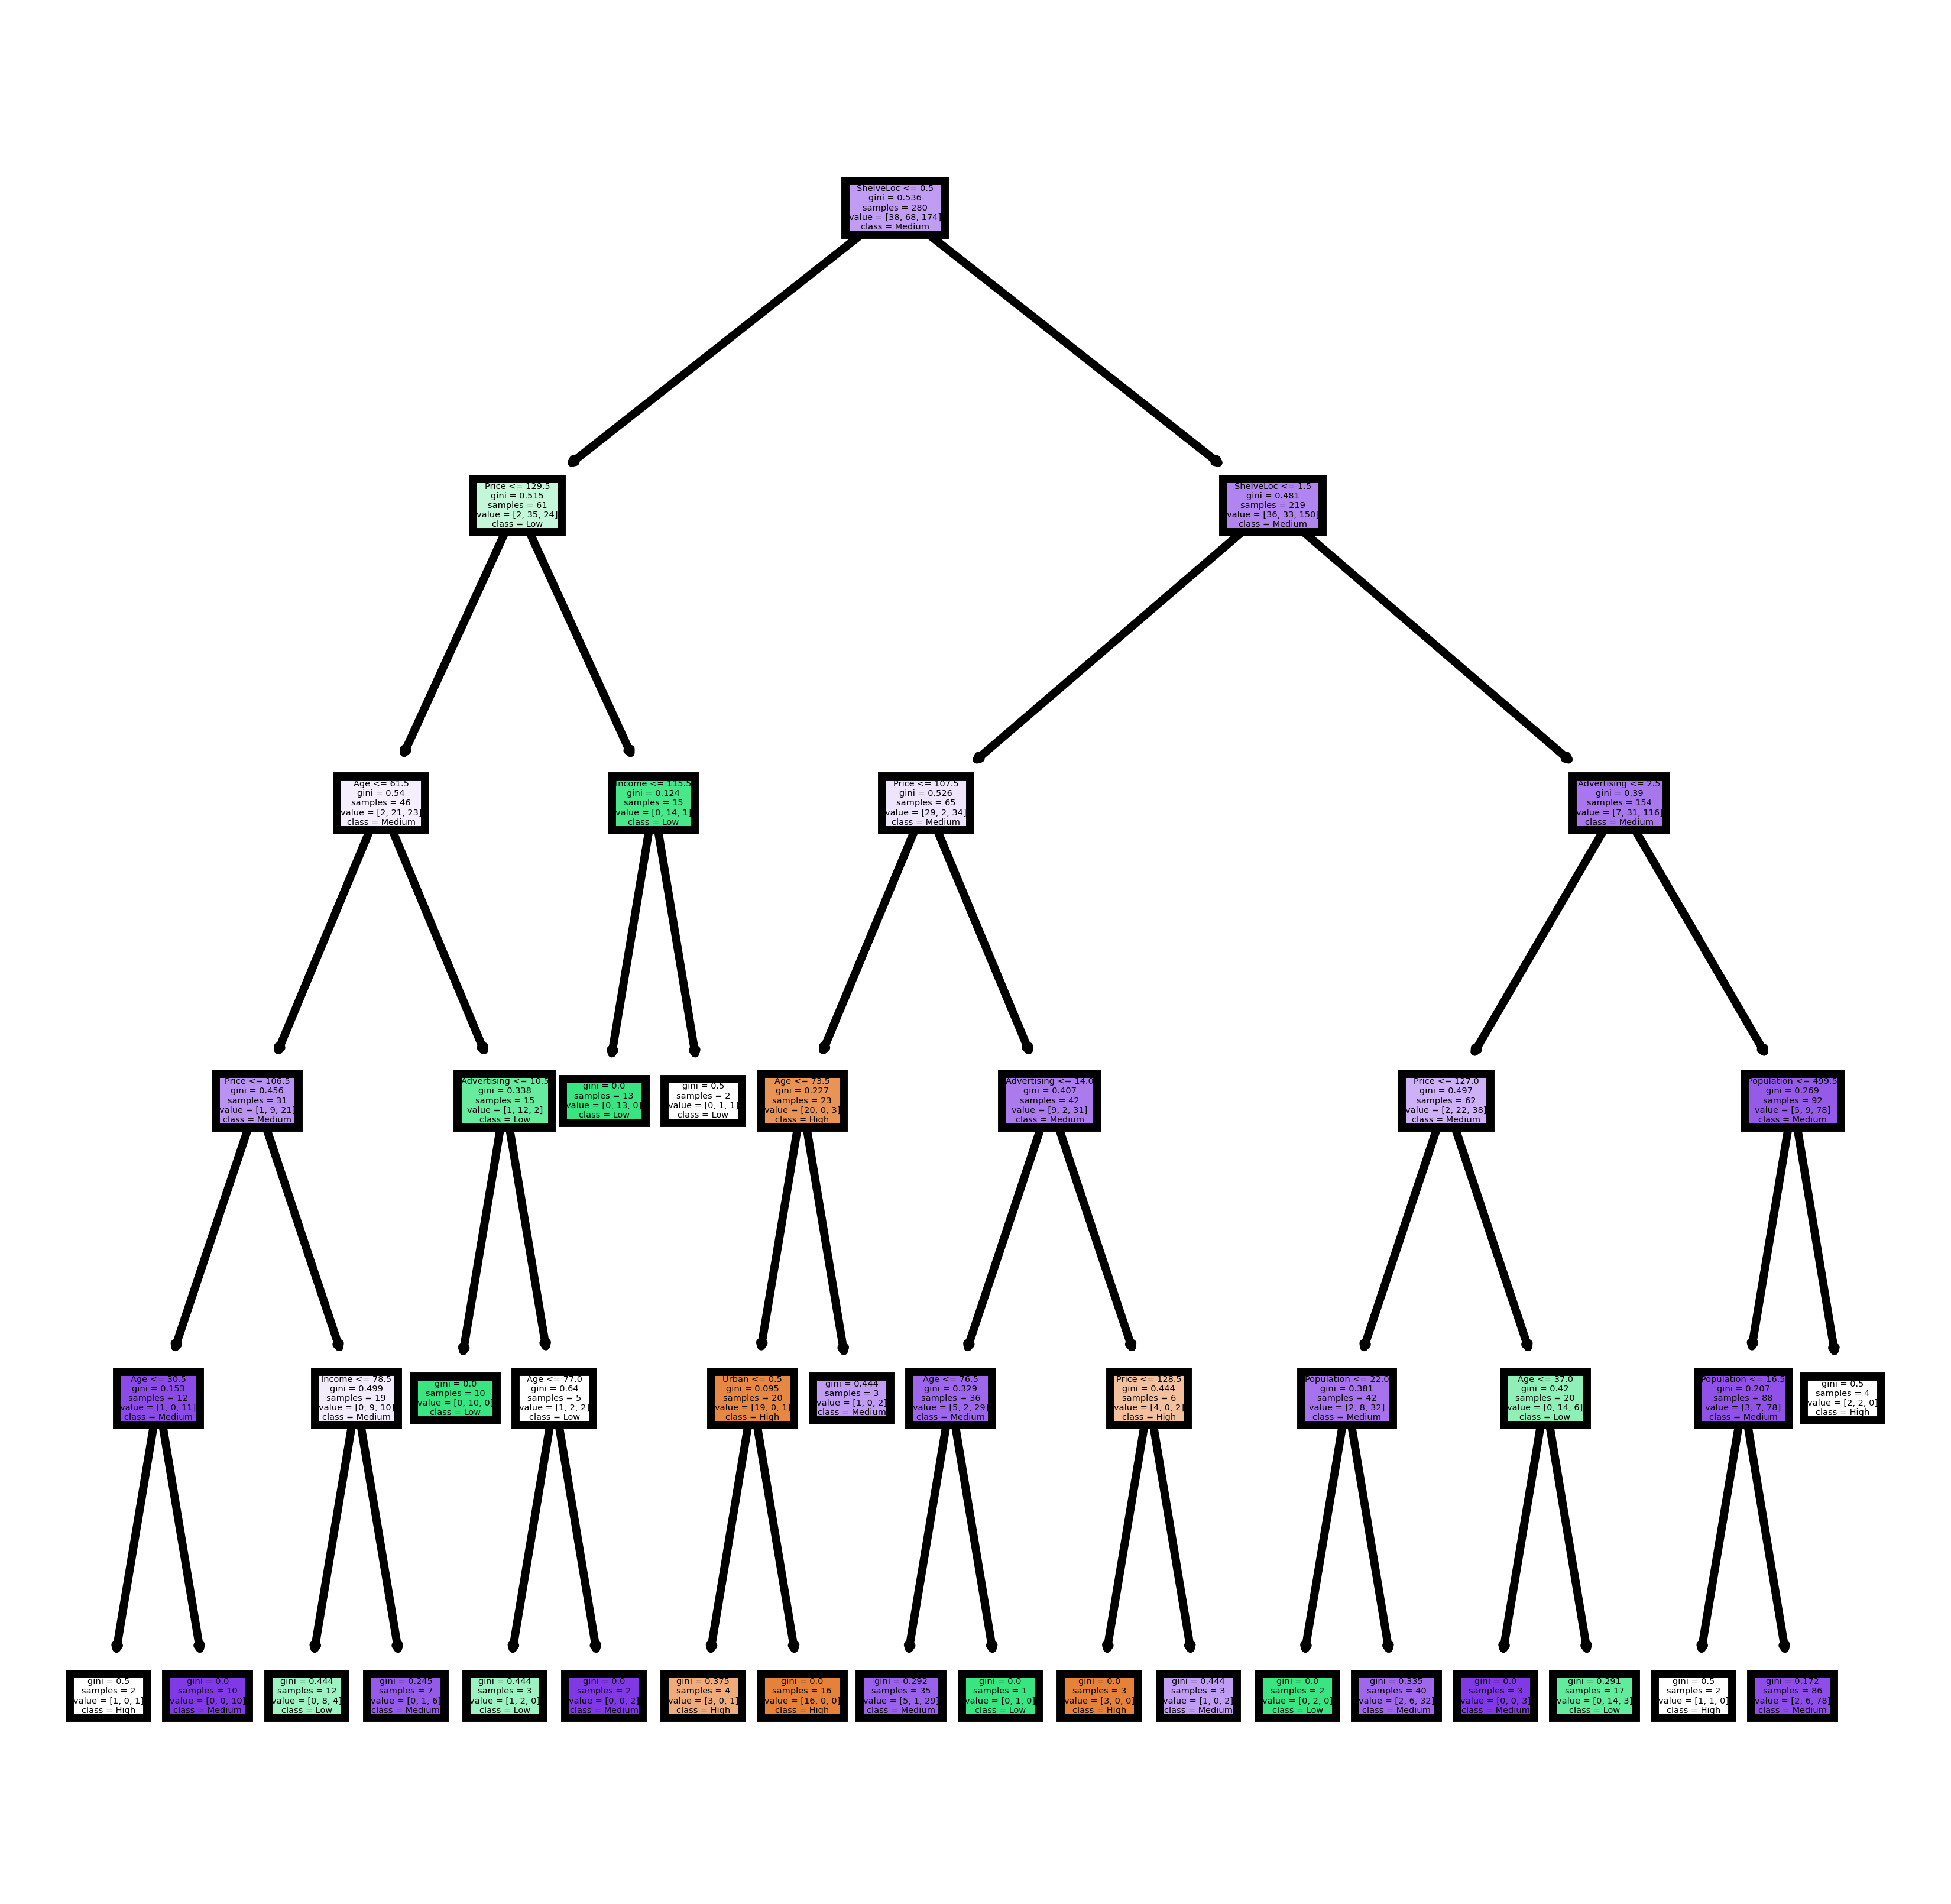

In [67]:
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn = ['High','Low','Medium']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 1000)
tree.plot_tree(company_model, feature_names = fn, class_names = cn, filled = True);

In [69]:
preds = company_model.predict(x_test)
pd.Series(preds).value_counts()

2    84
1    31
0     5
dtype: int64

In [70]:
from sklearn import metrics
metrics.accuracy_score(preds, y_test)

0.675

## Fraud Check

In [71]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is ACC0-1167

 Directory of C:\Users\shand\Documents\Siddy\ExcelR\Assignment\Decision Tree

14-01-2022  02:32    <DIR>          .
13-01-2022  03:26    <DIR>          ..
14-01-2022  00:26    <DIR>          .ipynb_checkpoints
13-01-2022  03:25            17,023 Company_Data.csv
14-01-2022  02:32           771,513 Decision Tree.ipynb
13-01-2022  03:25            21,837 Fraud_check.csv
13-01-2022  03:25             1,377 problem statement(company data).txt
13-01-2022  03:25               460 Problem_statement(Fraudcheck).txt
               5 File(s)        812,210 bytes
               3 Dir(s)  207,397,875,712 bytes free


In [72]:
fraud = pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [76]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [77]:
fraud.Undergrad.value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [78]:
fraud['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [79]:
fraud.Urban.value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [73]:
fraud1 = fraud.copy()

In [74]:
fraud1.Undergrad = label_encoder.fit_transform(fraud1.Undergrad)
fraud1["Marital.Status"] = label_encoder.fit_transform(fraud1["Marital.Status"])
fraud1.Urban = label_encoder.fit_transform(fraud.Urban)

In [75]:
fraud1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


In [80]:
fraud1.Undergrad.value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

In [82]:
fraud1['Marital.Status'].value_counts()

2    217
1    194
0    189
Name: Marital.Status, dtype: int64

In [83]:
fraud1.Urban.value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [90]:
n = []
for i in fraud1["Taxable.Income"]:
    if i <= 30000:
        n.append('Risky')
    else:
        n.append('Good')

In [92]:
fraud1['Taxable.Income'] = n

In [94]:
fraud1['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [95]:
fraud1['Taxable.Income'] = label_encoder.fit_transform(fraud1['Taxable.Income'])

In [96]:
fraud1['Taxable.Income'].value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

In [1]:
x = fraud1.loc[:, fraud1.columns != 'Taxable.Income']
y = fraud1.iloc[:,2] 

NameError: name 'fraud1' is not defined

In [99]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [100]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int32

### Building Decision Tree Classifier

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [102]:
fraud_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_split = 5)
fraud_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

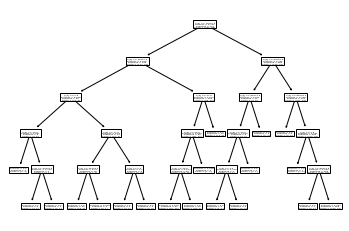

In [103]:
tree.plot_tree(fraud_model);

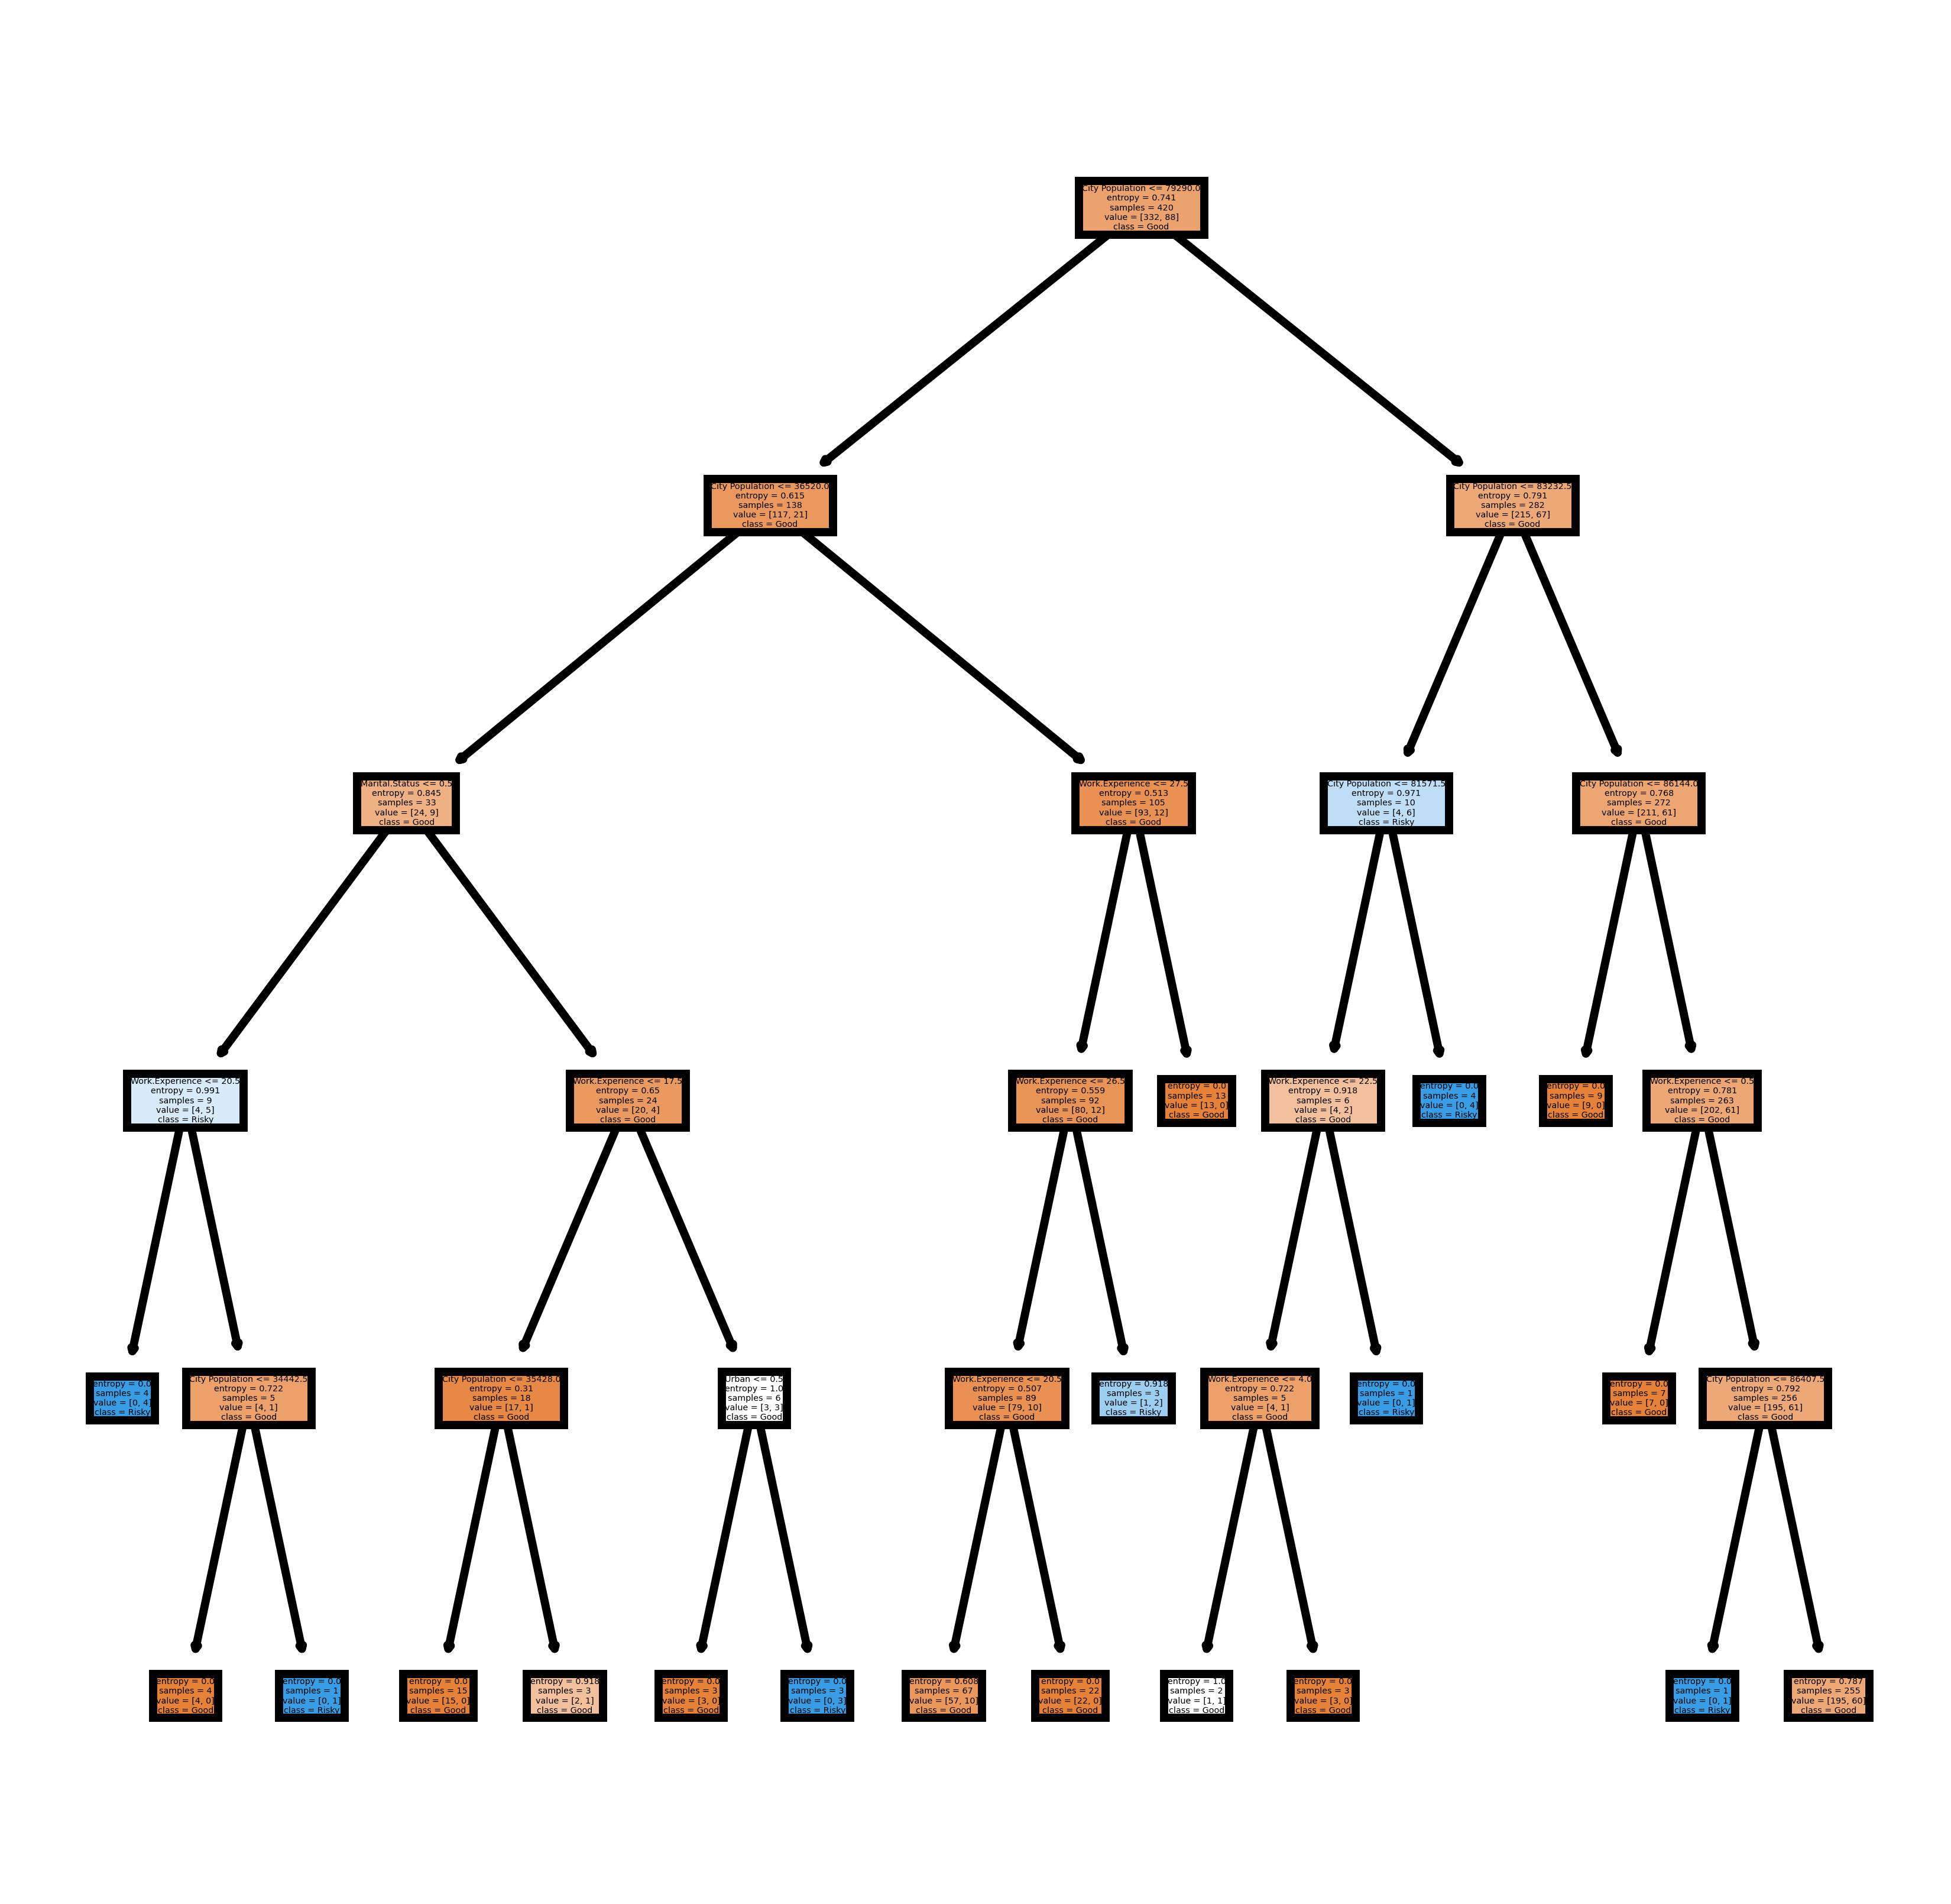

In [104]:
fn = ['Undergrad','Marital.Status','City Population','Work.Experience','Urban']
cn = ['Good','Risky']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 1000)
tree.plot_tree(fraud_model, feature_names = fn, class_names = cn, filled = True);

In [105]:
preds = fraud_model.predict(x_test)
pd.Series(preds).value_counts()

0    177
1      3
dtype: int64

In [106]:
metrics.accuracy_score(preds,y_test)

0.7833333333333333